<a href="https://colab.research.google.com/github/mayu200/LGMVIP-DS/blob/main/TASK_7_(Advanced_level_task)Develop_A_Neural_Network_That_Can_Read_Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lets Grow More**

**Name: Mayuri Dashrath Khatpe**

**Data Science Intern**

**Task-7: Develop A Neural Network That Can Read Handwriting **:

**Begin my neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners. **

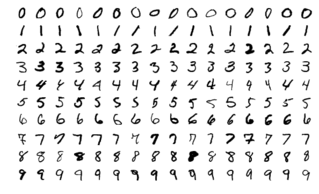

**Dataset link : https://en.wikipedia.org/wiki/MNIST_database**

**Importing Libraries**

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.color_palette("dark")

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

**Loading dataset**

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


**Plotting count plot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


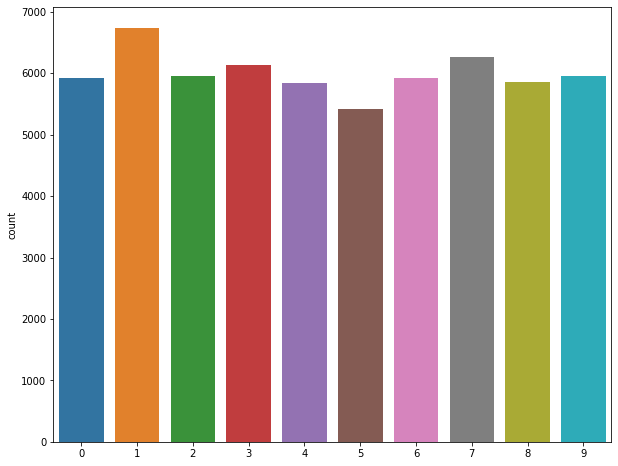

In [4]:
plt.figure(figsize = (10,8))
sns.countplot(y_train)

**Displaying some images**

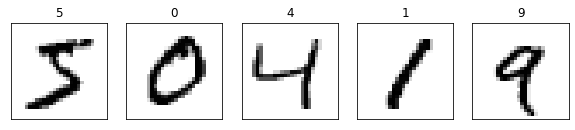

In [5]:
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

**Pre-processing the data**

In [6]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [8]:
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

**Creating the model**

**Model Architecture **

**We will have to first build the model architecture and define it based on our dataset. We are going to add the following layers:**

1. Conv2D - for the convolution layers

2. Dropout - to prevent overfitting         
 
3. Dense - a fully connected layer 

4. Softmax activation - This is used to convert all predictions into probability The model architecture can be tuned to get optimal performance

**so i am goimg to create a model with**

# **CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [10]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

**Training the model**

In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 635s 376ms/step - loss: 0.2528 - accuracy: 0.9264 - val_loss: 0.0892 - val_accuracy: 0.9797
Epoch 2/10
1688/1688 [==============================] - 635s 376ms/step - loss: 0.1037 - accuracy: 0.9701 - val_loss: 0.0780 - val_accuracy: 0.9848
Epoch 3/10
1688/1688 [==============================] - 636s 377ms/step - loss: 0.0819 - accuracy: 0.9764 - val_loss: 0.0892 - val_accuracy: 0.9852
Epoch 4/10
1688/1688 [==============================] - 639s 379ms/step - loss: 0.0728 - accuracy: 0.9800 - val_loss: 0.2751 - val_accuracy: 0.9607
Epoch 5/10
1688/1688 [==============================] - 639s 379ms/step - loss: 0.0617 - accuracy: 0.9818 - val_loss: 0.2343 - val_accuracy: 0.9687
Epoch 6/10
1688/1688 [==============================] - 641s 380ms/step - loss: 0.0562 - accuracy: 0.9834 - val_loss: 0.1365 - val_accuracy: 0.9822
Epoch 7/10
1688/1688 [==============================] - 642s 380ms/step - loss: 0.0510 - accuracy: 0.9849 - val_

**Saving and loading the model**

In [13]:
model.save('MNproject.h5')

In [14]:
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

**Evaluating the model**

In [15]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 25s 81ms/step - loss: 2.8290 - accuracy: 0.9884
Test Loss 2.8290047645568848
Test Accuracy 0.9883999824523926


**Plotting Training & Validation plots**

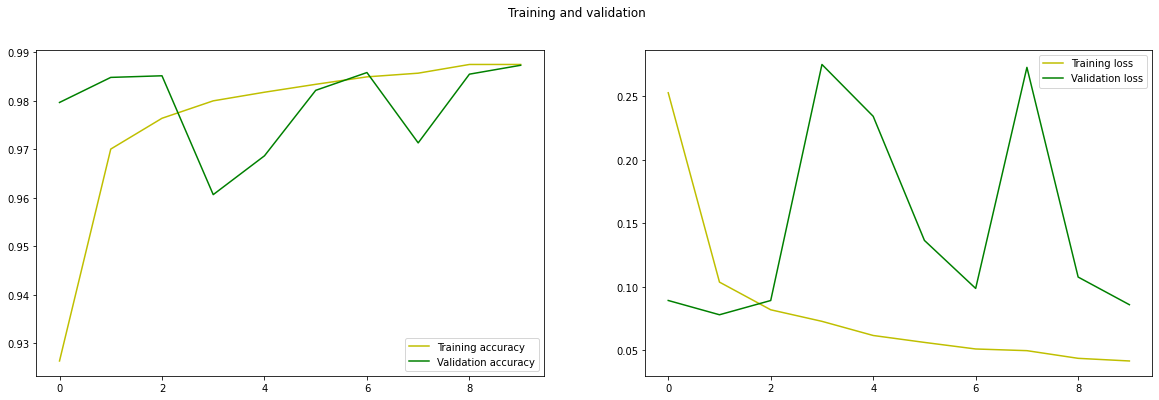

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [17]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    0,    0,    0,    0,    1,    1,    0,    0],
       [   1, 1127,    1,    1,    1,    0,    0,    4,    0,    0],
       [   1,    0, 1026,    0,    2,    0,    1,    2,    0,    0],
       [   0,    0,    6,  998,    0,    4,    0,    0,    1,    1],
       [   0,    0,    0,    0,  981,    0,    0,    0,    0,    1],
       [   1,    0,    1,    6,    0,  879,    2,    1,    0,    2],
       [   5,    2,    1,    0,    3,    2,  940,    0,    5,    0],
       [   0,    0,    5,    0,    1,    0,    0, 1020,    2,    0],
       [   1,    0,    4,    1,    1,    0,    0,    1,  966,    0],
       [   1,    0,    0,    2,   23,    2,    0,    7,    5,  969]],
      dtype=int32)>

**Plotting heat map**

Text(69.0, 0.5, 'Truth')

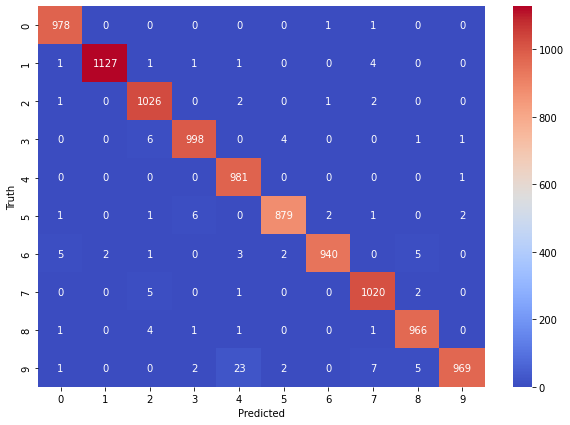

In [18]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Testing the Model**

(28, 28, 1)


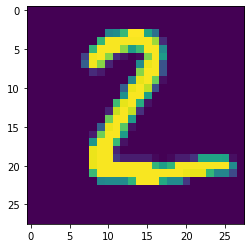

In [26]:
import numpy as np  
import matplotlib.pyplot as plt
img_path = x_test[1]  
print(img_path.shape)
if(len(img_path.shape) == 3):
    plt.imshow(np.squeeze(img_path))
elif(len(img_path.shape) == 2):
    plt.imshow(img_path)
else:
    print("Higher dimensional data")